In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import missingno as msno


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [4]:
riders = pd.read_csv('riders.csv')
train = pd.read_csv('train.csv')


In [5]:
train.rename(columns={'Order No': 'Order_No'}, inplace=True)
train['Order_No'] = train['Order_No'].str.replace('Order_No_', '')
train['Order_No'] = train['Order_No'].astype(int)
train.rename(columns={'User Id': 'User_Id'}, inplace=True)
train['User_Id'] = train['User_Id'].str.replace('User_Id_', '')
train['User_Id'] = train['User_Id'].astype(int)
train.rename(columns={'Rider Id': 'Rider_Id'}, inplace=True)
train['Rider_Id'] = train['Rider_Id'].str.replace('Rider_Id_', '')
train['Rider_Id'] = train['Rider_Id'].astype(int)


In [15]:
#univariate analysis of the distance column with a few different forms 

train['Distance (KM)'].describe()




count    21201.000000
mean         9.506533
std          5.668963
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         49.000000
Name: Distance (KM), dtype: float64

Predicted Time from Pickup to Arrival for Distance 10 KM: [1604.99470901]
Mean Squared Error: 650166.4978362916
R-squared: 0.3306292164283291


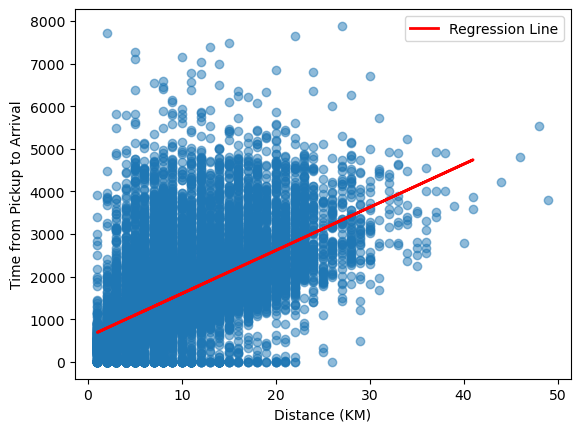

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data (Assuming you have a dataset with 'Distance (KM)' and 'Time from Pickup to Arrival')
riders = pd.read_csv('riders.csv')
train = pd.read_csv('train.csv')

# Split the data into features (X) and the target variable (y)
X = train[['Distance (KM)']]
y = train['Time from Pickup to Arrival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

new_distance = [[10]]  # Replace '10' with the distance you want to predict for
predicted_time = model.predict(new_distance)
print("Predicted Time from Pickup to Arrival for Distance 10 KM:", predicted_time)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


X = train[['Distance (KM)']]
y = train['Time from Pickup to Arrival']

plt.scatter(X, y, alpha=0.5)
plt.xlabel('Distance (KM)')
plt.ylabel('Time from Pickup to Arrival')

plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and legend
plt.xlabel('Distance (KM)')
plt.ylabel('Time from Pickup to Arrival')
plt.legend()

# Show the plot
plt.show()


<Axes: xlabel='Distance (KM)', ylabel='Count'>

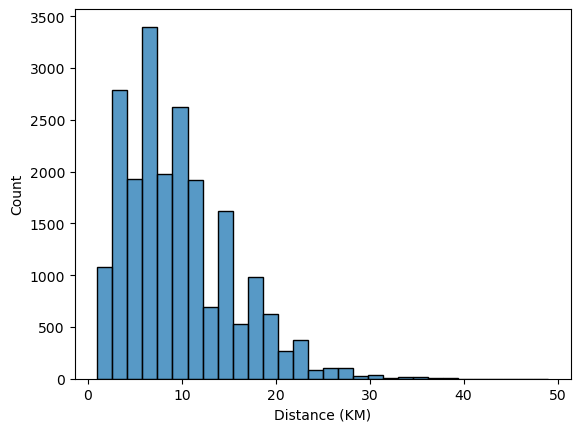

In [23]:
sns.histplot(train['Distance (KM)'] , bins=30)


<Axes: xlabel='Distance (KM)'>

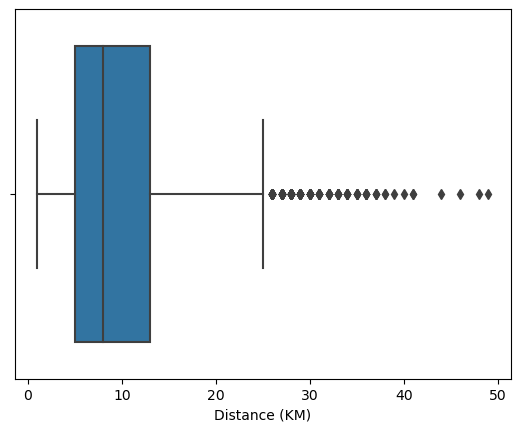

In [18]:
sns.boxplot(x=train['Distance (KM)'])

<Axes: xlabel='Distance (KM)', ylabel='Density'>

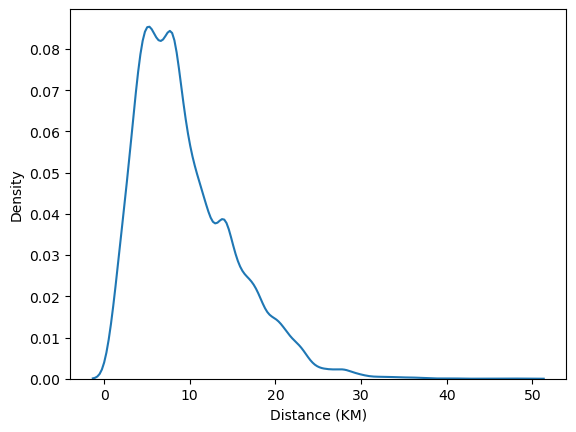

In [19]:
sns.kdeplot(train['Distance (KM)'])

In [20]:
# univariate analysis of the platform type

train['Platform Type'].describe()

count    21201.000000
mean         2.752182
std          0.625178
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: Platform Type, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

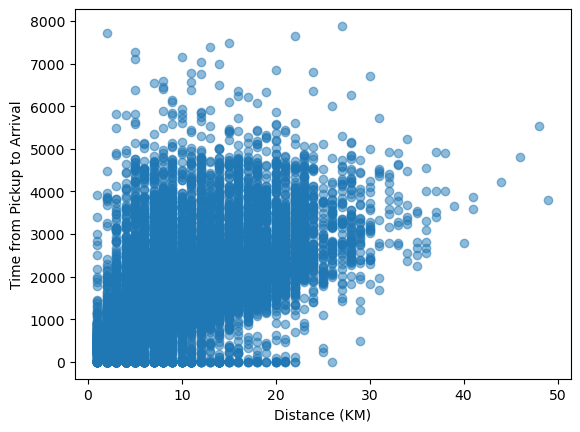

In [16]:
X = train[['Distance (KM)']]
y = train['Time from Pickup to Arrival']

plt.scatter(X, y, alpha=0.5)
plt.xlabel('Distance (KM)')
plt.ylabel('Time from Pickup to Arrival')

plt.show

X = train[['independent_var1', 'independent_var2', ...]]  # Independent variables
y = train['Time from Pickup to Arrival']  # Dependent variable

# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Fitting
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

<Axes: xlabel='Platform Type', ylabel='count'>

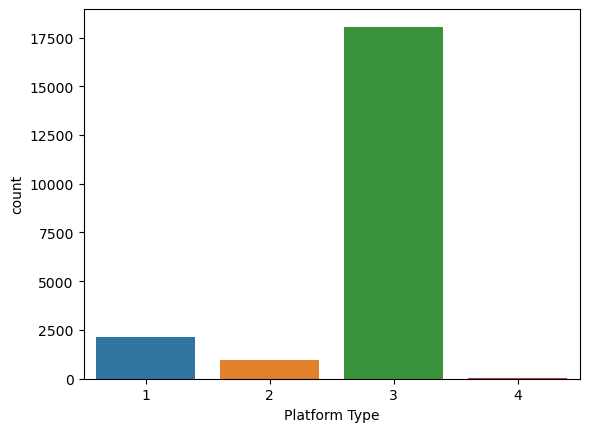

In [22]:
sns.countplot(x=train['Platform Type'])

In [27]:
#univariate analysis of confirmation weekday 

train['Confirmation - Weekday (Mo = 1)'].describe()

count    21201.000000
mean         3.240225
std          1.567228
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          7.000000
Name: Confirmation - Weekday (Mo = 1), dtype: float64

<Axes: xlabel='Confirmation - Weekday (Mo = 1)', ylabel='count'>

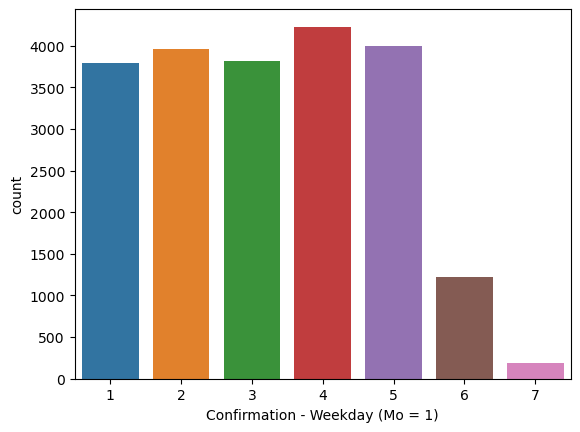

In [17]:
sns.countplot(x=train['Confirmation - Weekday (Mo = 1)'])

In [38]:
#having difficulties with converting the "personal or business" values to something numerical that we can get summary statistics from,
#seeking advice because this is actually a binary classification and would be perfect for a logisitc regression

train['Personal or Business'] = train['Personal or Business'].astype(str)

train['Personal or Business'] = train['Personal or Business'].replace({'Business': 0, 'Personal': 1})


# Let's see the updated column
print(train['Personal or Business'])






0        nan
1        nan
2        nan
3        nan
4        nan
        ... 
21196    nan
21197    nan
21198    nan
21199    nan
21200    nan
Name: Personal or Business, Length: 21201, dtype: object
